In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [ ]:
np.random.seed(0)

In [ ]:
df=pd.read_csv("chennai_cleaned_data.csv")

In [ ]:
df.dtypes

,0
Unnamed: 0,object
Price,float64


In [ ]:
df['Unnamed: 0']=pd.to_datetime(df['Unnamed: 0'])

In [ ]:
df.dtypes

,0
Unnamed: 0,datetime64[ns]
Price,float64


In [ ]:
df.set_index('Unnamed: 0',inplace=True)

In [ ]:
df.head()

,Price
Unnamed: 0,
2023-01-01,2600000.0
2023-01-02,9500000.0
2023-01-03,2600000.0
2023-01-04,1100000.0
2023-01-05,1800000.0


In [ ]:
df.shape

(731, 1)

In [ ]:
def stationary_test(dataframe,column):
  dataframe['rolling_mean']=dataframe[column].rolling(window=12).mean().shift(1)
  dataframe['rolling_std']=dataframe[column].rolling(window=12).std().shift(1)
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
  print(stats)
  for key,value in adftest[4].items():
    print('\n Critical Values:')
    print(f'   {key}, {value}')
  dataframe.dropna(inplace=True)
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y=column)
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y='rolling_mean')
  sns.lineplot(data=dataframe.dropna(),x=dataframe.index,y='rolling_std')
  plt.xticks(rotation=90)
  plt.legend()

Test Statistic                -5.981201e+00
p-value                        1.836750e-07
Lags Used                      2.000000e+01
Number of Observations Used    7.100000e+02
dtype: float64

 Critical Values:
   1%, -3.439593802573824

 Critical Values:
   5%, -2.865619356068967

 Critical Values:
   10%, -2.568942332870462


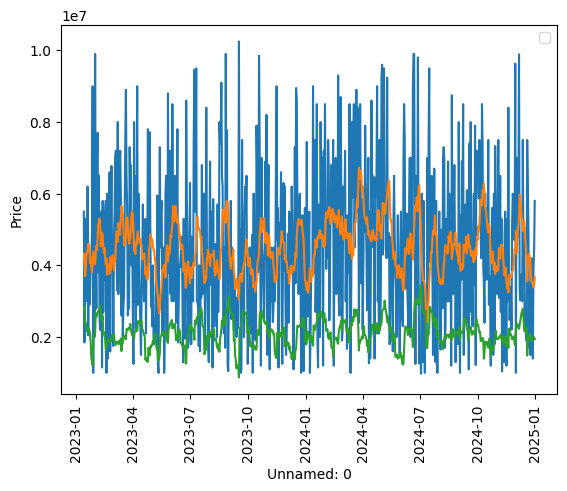

In [ ]:
stationary_test(df,'Price')

Test Statistic                -8.952589e+00
p-value                        8.643190e-15
Lags Used                      2.000000e+01
Number of Observations Used    6.970000e+02
dtype: float64

 Critical Values:
   1%, -3.439766853257416

 Critical Values:
   5%, -2.8656956054873377

 Critical Values:
   10%, -2.5689829557089308


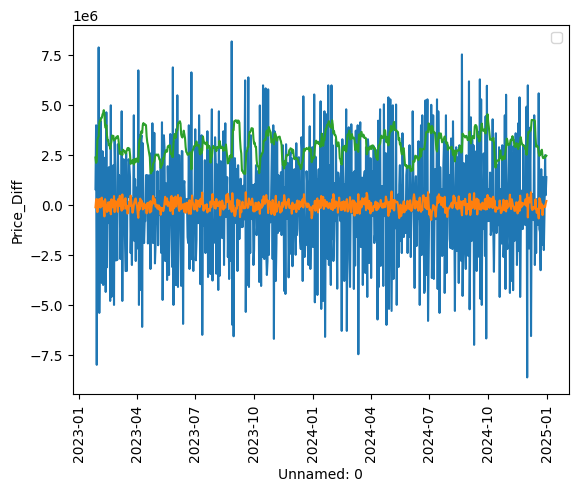

In [ ]:
df1=df.copy()
df1['Price_Diff']=df1['Price']-df1['Price'].shift(1)
df1.dropna(inplace=True)
stationary_test(df1,'Price_Diff')

Test Statistic                -5.735788e+00
p-value                        6.443280e-07
Lags Used                      2.000000e+01
Number of Observations Used    6.980000e+02
dtype: float64

 Critical Values:
   1%, -3.439753311961436

 Critical Values:
   5%, -2.8656896390914217

 Critical Values:
   10%, -2.568979777013325


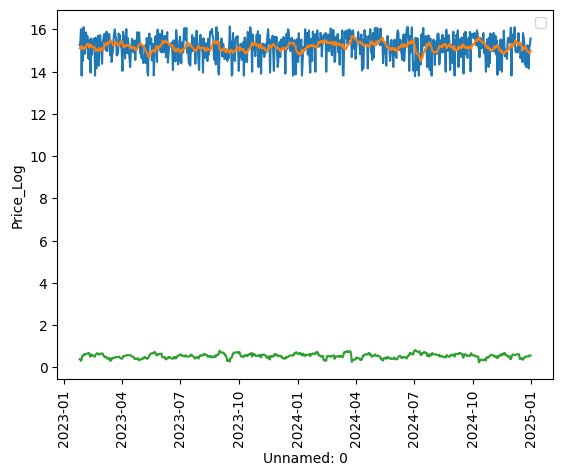

In [ ]:
df2=df.copy()
df2['Price_Log']=np.log(df2['Price'])
df2.dropna(inplace=True)
stationary_test(df2,'Price_Log')

Test Statistic                -5.799920e+00
p-value                        4.656856e-07
Lags Used                      2.000000e+01
Number of Observations Used    6.980000e+02
dtype: float64

 Critical Values:
   1%, -3.439753311961436

 Critical Values:
   5%, -2.8656896390914217

 Critical Values:
   10%, -2.568979777013325


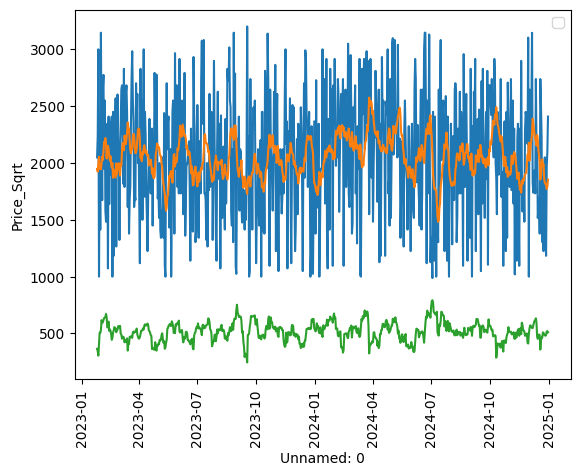

In [ ]:
df3=df.copy()
df3['Price_Sqrt']=np.sqrt(df3['Price'])
df3.dropna(inplace=True)
stationary_test(df3,'Price_Sqrt')

Test Statistic                -5.771755e+00
p-value                        5.372154e-07
Lags Used                      2.000000e+01
Number of Observations Used    6.980000e+02
dtype: float64

 Critical Values:
   1%, -3.439753311961436

 Critical Values:
   5%, -2.8656896390914217

 Critical Values:
   10%, -2.568979777013325


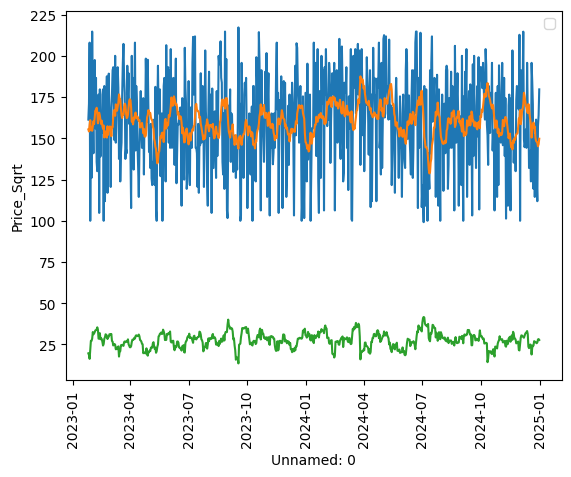

In [ ]:
df4=df.copy()
df4['Price_Sqrt']=np.cbrt(df4['Price'])
df4.dropna(inplace=True)
stationary_test(df4,'Price_Sqrt')

Test Statistic                -5.733996e+00
p-value                        6.501763e-07
Lags Used                      2.000000e+01
Number of Observations Used    6.980000e+02
dtype: float64

 Critical Values:
   1%, -3.439753311961436

 Critical Values:
   5%, -2.8656896390914217

 Critical Values:
   10%, -2.568979777013325


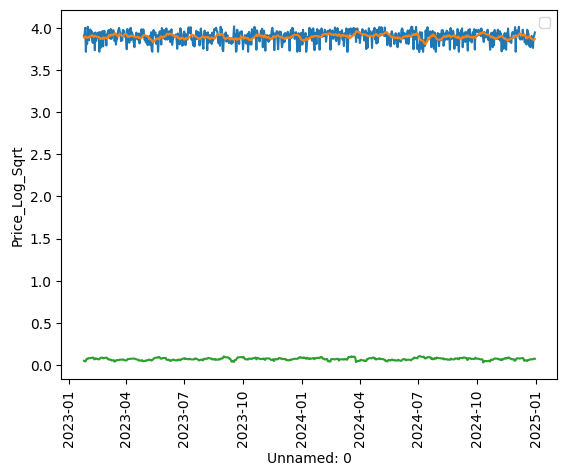

In [ ]:
df5=df.copy()
df5['Price_Log']=np.log(df5['Price'])
df5['Price_Log_Sqrt']=np.sqrt(df5['Price_Log'])
df5.dropna(inplace=True)
stationary_test(df5,'Price_Log_Sqrt')

Test Statistic                -9.190121e+00
p-value                        2.134499e-15
Lags Used                      2.000000e+01
Number of Observations Used    6.970000e+02
dtype: float64

 Critical Values:
   1%, -3.439766853257416

 Critical Values:
   5%, -2.8656956054873377

 Critical Values:
   10%, -2.5689829557089308


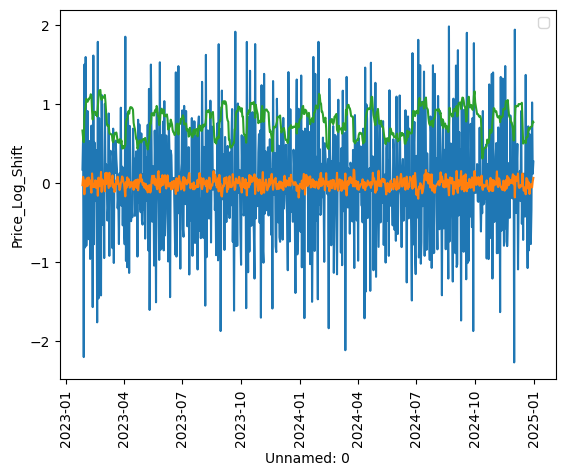

In [ ]:
df6=df.copy()
df6['Price_Log']=np.log(df6['Price'])
df6['Price_Log_Shift']=df6['Price_Log']-df6['Price_Log'].shift(1)
df6.dropna(inplace=True)
stationary_test(df6,'Price_Log_Shift')

Test Statistic                -5.733461e+00
p-value                        6.519333e-07
Lags Used                      2.000000e+01
Number of Observations Used    6.980000e+02
dtype: float64

 Critical Values:
   1%, -3.439753311961436

 Critical Values:
   5%, -2.8656896390914217

 Critical Values:
   10%, -2.568979777013325


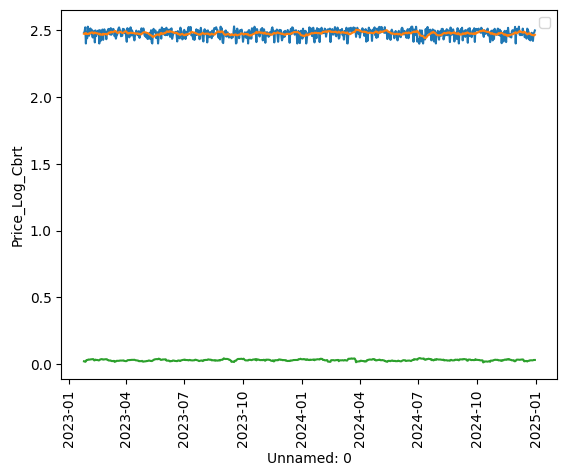

In [ ]:
df7=df.copy()
df7['Price_Log']=np.log(df7['Price'])
df7['Price_Log_Cbrt']=np.cbrt(df7['Price_Log'])
df7.dropna(inplace=True)
stationary_test(df7,'Price_Log_Cbrt')

Test Statistic                -5.735788e+00
p-value                        6.443280e-07
Lags Used                      2.000000e+01
Number of Observations Used    6.980000e+02
dtype: float64

 Critical Values:
   1%, -3.439753311961436

 Critical Values:
   5%, -2.8656896390914217

 Critical Values:
   10%, -2.568979777013325


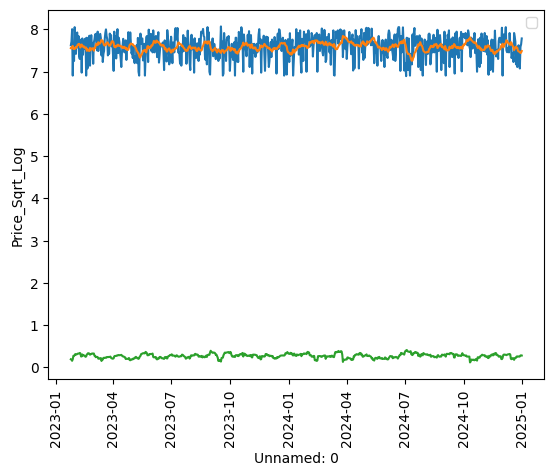

In [ ]:
df12=df.copy()
df12['Price_Sqrt']=np.sqrt(df12['Price'])
df12['Price_Sqrt_Log']=np.log(df12['Price_Sqrt'])
df12.dropna(inplace=True)
stationary_test(df12,'Price_Sqrt_Log')

Test Statistic                -5.735788e+00
p-value                        6.443280e-07
Lags Used                      2.000000e+01
Number of Observations Used    6.980000e+02
dtype: float64

 Critical Values:
   1%, -3.439753311961436

 Critical Values:
   5%, -2.8656896390914217

 Critical Values:
   10%, -2.568979777013325


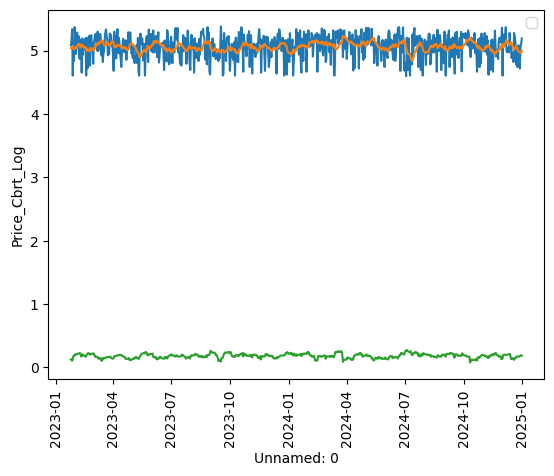

In [ ]:
df13=df.copy()
df13['Price_Cbrt']=np.cbrt(df13['Price'])
df13['Price_Cbrt_Log']=np.log(df13['Price_Cbrt'])
df13.dropna(inplace=True)
stationary_test(df13,'Price_Cbrt_Log')

In [ ]:

df_model=df.copy()
df_model['Price_Diff']=df_model['Price']-df_model['Price'].shift(1)
df_model['Price_Log']=np.log(df_model['Price'])
df_model['Price_Sqrt']=np.sqrt(df_model['Price'])
df_model['Price_Cbrt']=np.cbrt(df_model['Price'])
df_model['Price_Log_Sqrt']=np.sqrt(df_model['Price_Log'])
df_model['Price_Log_Shift']=df_model['Price_Log']-df_model['Price_Log'].shift(1)
df_model['Price_Log_Cbrt']=np.cbrt(df_model['Price_Log'])
df_model['Price_Detrend']=df_model['Price']-df_model['Price'].mean()
df_model['Price_Log_Detrend']=df_model['Price_Log']-df_model['Price_Log'].mean()
df_model['Price_Sqrt_Detrend']=df_model['Price_Sqrt']-df_model['Price_Sqrt'].mean()
df_model['Price_Cbrt_Detrend']=df_model['Price_Cbrt']-df_model['Price_Cbrt'].mean()
df_model['Price_Sqrt_Log']=np.log(df_model['Price_Sqrt'])
df_model['Price_Cbrt_Log']=np.log(df_model['Price_Cbrt'])
df_model.dropna(inplace=True)


(array([19358., 19448., 19539., 19631., 19723., 19814., 19905., 19997.,
        20089.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19448.0, 0, '2023-04'),
  Text(19539.0, 0, '2023-07'),
  Text(19631.0, 0, '2023-10'),
  Text(19723.0, 0, '2024-01'),
  Text(19814.0, 0, '2024-04'),
  Text(19905.0, 0, '2024-07'),
  Text(19997.0, 0, '2024-10'),
  Text(20089.0, 0, '2025-01')])

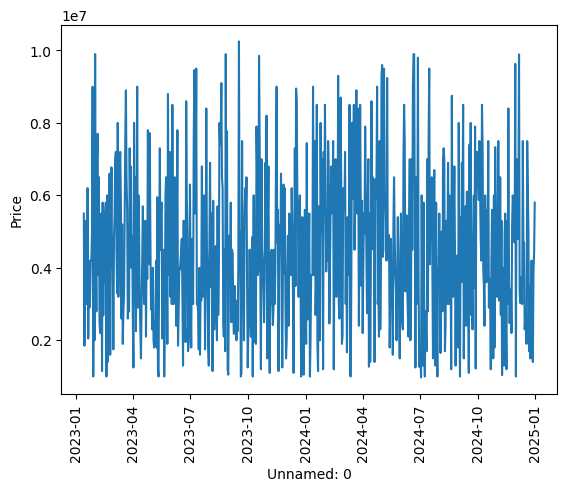

In [ ]:
sns.lineplot(x=df.index,y=df['Price'])
plt.xticks(rotation=90)

In [ ]:
train=df_model.iloc[:585]
test=df_model.iloc[585:]

In [ ]:
model = auto_arima(df_model['Price_Diff'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Diff'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23431.651, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=23012.598, Time=0.73 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.58 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=inf, Time=2.37 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=inf, Time=4.14 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=4.37 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=23260.393, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=4.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=3.16 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=23172.803, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=1.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=2.91 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=6.89 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=23133.772, Time=0.6

In [ ]:
model1=ARIMA(train['Price_Diff'].dropna(),order=(0,0,1))
model1=model1.fit()
arima_pred=model1.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred1']=arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-151-795cf8dea468>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred1']=arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Diff'], test['arimaPred1'])
mse = mean_squared_error(test['Price_Diff'], test['arimaPred1'])
rmse = np.sqrt(mse)
aic=model1.aic
bic=model1.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 2415237.793480728 MSE 9179710681927.602 RMSE 3029803.7365360158  AIC 18768.875424103928 BIC 18781.990259645623


In [ ]:
model1=ARIMA(df_model['Price_Diff'].dropna(),order=(0,0,1))
model1=model1.fit()
forecast_steps=365
predictions=model1.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
last_known_price = df_model['Price'].iloc[-1]
predicted_prices = []
for pred in predictions.values:
    last_known_price += pred
    predicted_prices.append(last_known_price)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


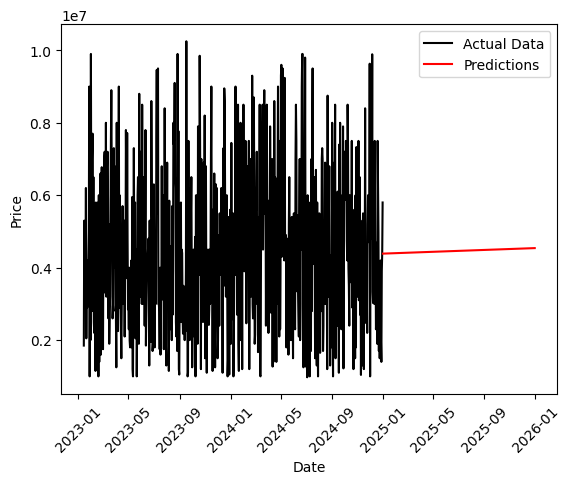

In [ ]:
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
model = auto_arima(df_model['Price_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Log'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5946.303, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5020.507, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4307.855, Time=0.27 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=3787.122, Time=0.41 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=3434.424, Time=0.75 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=3133.973, Time=0.81 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.82 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=1227.347, Time=0.76 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=2.79 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1224.431, Time=2.34 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.63 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf

In [ ]:
model2 = ARIMA(train['Price_Log'].dropna(), order=(2,0,1))
model2 = model2.fit()
arima_pred = model2.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred2'] = arima_pred.values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-156-66e57388616f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [ ]:
mae = mean_absolute_error(test['Price_Log'], test['arimaPred2'])
mse = mean_squared_error(test['Price_Log'], test['arimaPred2'])
rmse = np.sqrt(mse)
aic=model2.aic
bic=model2.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.43880219224387734 MSE 0.299541281961732 RMSE 0.5473036469472243 AIC 990.9113551858292 BIC 1012.7694144219885


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

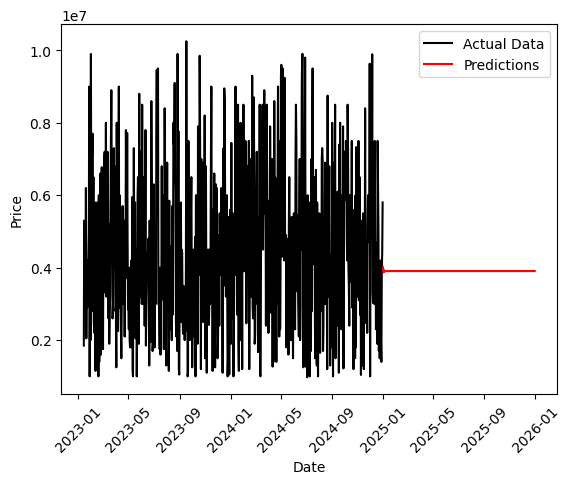

In [ ]:
model2=ARIMA(df_model['Price_Log'].dropna(),order=(2,0,1))
model2=model2.fit()
forecast_steps=365
predictions=model2.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = np.exp(pred)
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[4013636.4775300124,
 3870885.4602792626,
 3928379.243579813,
 3895278.7909851777,
 3913929.1265586806]

In [ ]:
model = auto_arima(df_model['Price_Sqrt'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Sqrt'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13036.793, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12432.224, Time=0.16 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=12126.668, Time=0.33 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=11945.670, Time=0.45 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=11813.303, Time=0.67 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=11719.689, Time=4.38 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=11473.715, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.44 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.88 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=1.03 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.47 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=11317.781, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.81 sec
 ARIMA(3,0,0)(0,0,0)[0]             :

In [ ]:
model3 = ARIMA(train['Price_Sqrt'].dropna(), order=(3,0,0))
model3 = model3.fit()
arima_pred = model3.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred3'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Sqrt'], test['arimaPred3'])))
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
forecast_steps = 365
predictions = model3.forecast(steps=forecast_steps)
predicted_prices = []
for pred in predictions.values:
    t = pred**2
    predicted_prices.append(t)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


514.7876842718362


<ipython-input-161-105f60e18703>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred3'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Sqrt'], test['arimaPred3'])
mse = mean_squared_error(test['Price_Sqrt'], test['arimaPred3'])
rmse = np.sqrt(mse)
aic=model3.aic
bic=model3.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 423.8443016585331 MSE 265006.35987795965 RMSE 514.7876842718362  AIC 9007.568125731274 BIC 9029.426184967433


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


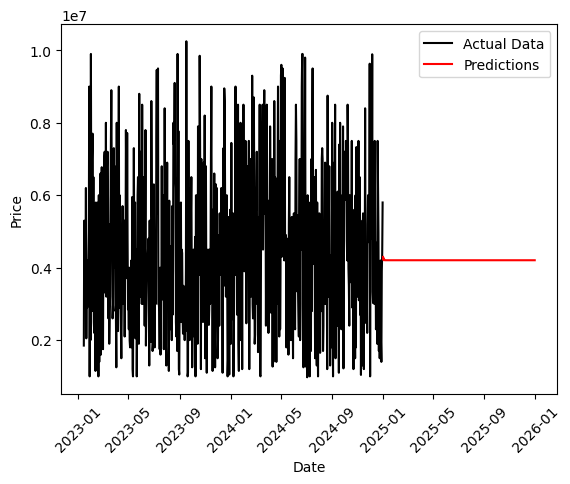

In [ ]:
model3=ARIMA(df_model['Price_Sqrt'].dropna(),order=(3,0,0))
model3=model3.fit()
forecast_steps=365
predictions=model3.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = pred**2
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[4297999.396701203,
 4206781.287644317,
 4255786.740485624,
 4212318.806348428,
 4205700.342272365]

In [ ]:
model=auto_arima(df_model['Price_Cbrt'].dropna(),seasonal=False,trace=True,stepwise=False)
model=model.fit(df_model['Price_Cbrt'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9350.947, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8640.610, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=8241.350, Time=0.21 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=8005.036, Time=0.33 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=7832.634, Time=0.46 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=7707.153, Time=0.84 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=7280.240, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.77 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.87 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=6860.943, Time=0.51 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=7117.951, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.34 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AI

In [ ]:
model4=ARIMA(train['Price_Cbrt'].dropna(),order=(1,0,4))
model4=model4.fit()
arima_pred=model4.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred4']=arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Cbrt'],test['arimaPred4'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


27.551344003761873


<ipython-input-166-bc9720fca73d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred4']=arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Cbrt'], test['arimaPred4'])
mse = mean_squared_error(test['Price_Cbrt'], test['arimaPred4'])
rmse = np.sqrt(mse)
aic=model4.aic
bic=model4.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 22.532150145107835 MSE 759.0765564136253 RMSE 27.551344003761873 AIC 5582.534501836204 BIC 5613.135784766827


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


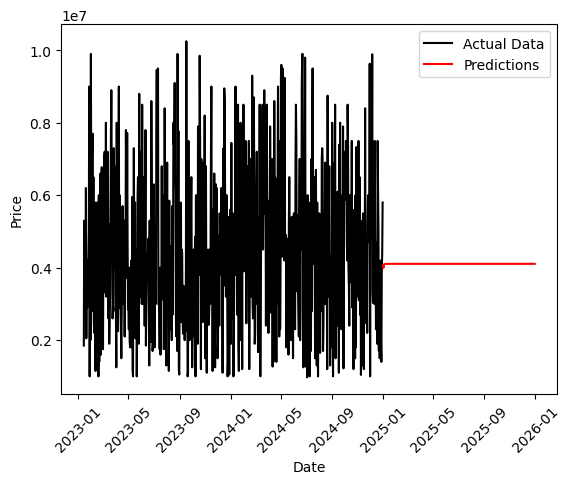

In [ ]:
model4=ARIMA(df_model['Price_Cbrt'].dropna(),order=(1,0,4))
model4=model4.fit()
forecast_steps=365
future_dates=pd.date_range(start='2025-01-01',periods=forecast_steps,freq='D')
predictions=model4.forecast(steps=forecast_steps)
predicted_prices=[]
for pred in predictions.values:
  t=pred**3
  predicted_prices.append(t)
plt.plot(df_model.index,df_model['Price'],label='Actual Data',color="black")
plt.plot(future_dates,predicted_prices,label='Predictions',color='red')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[4064565.311283982,
 3995587.2918309593,
 4085699.303980766,
 4096050.6125507248,
 4099116.8663302525]

In [ ]:
model=auto_arima(df_model['Price_Log_Sqrt'].dropna(),seasonal=False,trace=True,stepwise=False)
model=model.fit(df_model['Price_Log_Sqrt'].dropna())

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3992.463, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3034.958, Time=0.14 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2241.002, Time=0.26 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1613.065, Time=0.40 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1179.028, Time=0.47 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=790.499, Time=0.69 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1689.244, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-1675.808, Time=0.25 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-1694.479, Time=2.41 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-1687.974, Time=1.91 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1672.231, Time=0.76 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.90 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.68 sec
 ARIMA(3,0,0)(0,0,0)[0]   

In [ ]:
model5=ARIMA(train['Price_Log_Sqrt'].dropna(),order=(4,0,1))
model5=model5.fit()
arima_pred=model5.predict(start=len(train),end=len(train)+len(test)-1)
test['arimaPred5']=arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Log_Sqrt'],test['arimaPred5'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.070684327885881


<ipython-input-171-0c78527bf7a9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred5']=arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Log_Sqrt'], test['arimaPred5'])
mse = mean_squared_error(test['Price_Log_Sqrt'], test['arimaPred5'])
rmse = np.sqrt(mse)
aic=model5.aic
bic=model5.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.0564336767521727 MSE 0.004996274208678734 RMSE 0.070684327885881  AIC -1402.2247383650954 BIC -1371.6234554344724


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


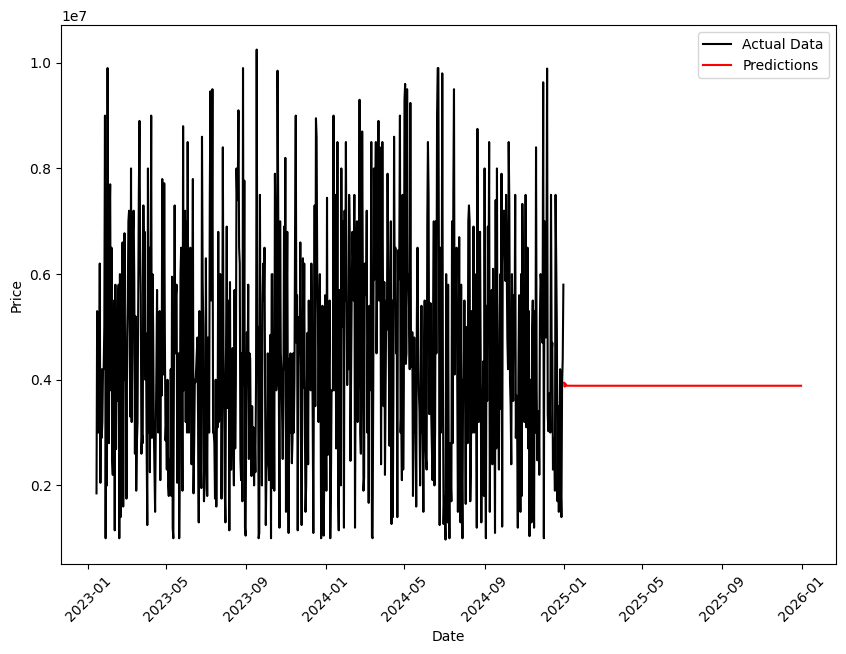

In [ ]:
model5=ARIMA(df_model['Price_Log_Sqrt'].dropna(),order=(4,0,1))
model5=model5.fit()
forecast_steps=365
future_dates=pd.date_range(start='2025-01-01',periods=forecast_steps,freq='D')
predictions=model5.forecast(steps=forecast_steps)
predicted_prices=[]
for pred in predictions.values:
  t=np.exp(pred**2)
  predicted_prices.append(t)
plt.figure(figsize=(10,7))
plt.plot(df_model.index,df_model['Price'],label='Actual Data',color="black")
plt.plot(future_dates,predicted_prices,label='Predictions',color='red')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:2]

[3942398.989469223, 3868784.266360382]

In [ ]:
model = auto_arima(df_model['Price_Log_Cbrt'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Log_Cbrt'].dropna())


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3341.398, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2373.282, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1526.078, Time=0.18 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=847.134, Time=0.56 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=362.011, Time=2.96 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=-63.718, Time=1.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-2916.614, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-2896.961, Time=0.34 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-2870.145, Time=0.91 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-2912.347, Time=0.79 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-2513.776, Time=0.68 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.06 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.55 sec
 ARIMA(3,0,0)(0,0,0)[0]     

In [ ]:
model6 = ARIMA(train['Price_Log_Cbrt'].dropna(), order=(1,0,1))
model6 = model6.fit()
arima_pred = model6.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred6'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Log_Cbrt'], test['arimaPred6'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.030024456360741858


<ipython-input-176-b60cb833ba2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred6'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Log_Cbrt'], test['arimaPred6'])
mse = mean_squared_error(test['Price_Log_Cbrt'], test['arimaPred6'])
rmse = np.sqrt(mse)
aic=model6.aic
bic=model6.bic
print("MAE {} MSE {} RMSE {}  AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.023949603787130666 MSE 0.0009014679797580921 RMSE 0.030024456360741858  AIC -2410.4712349991833 BIC -2392.984787610256


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


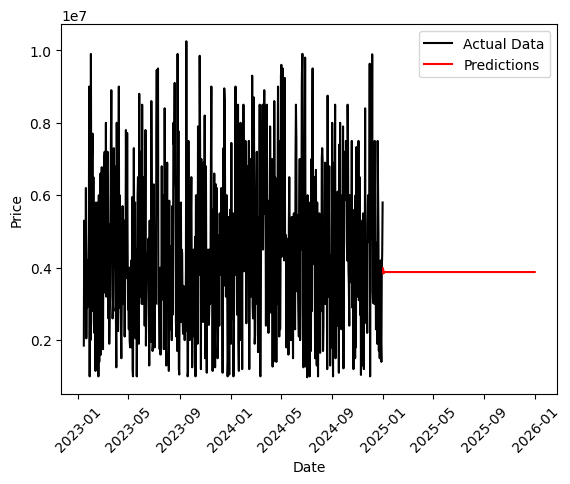

In [ ]:

model6=ARIMA(df_model['Price_Log_Cbrt'].dropna(),order=(1,0,1))
model6=model6.fit()
forecast_steps=365
predictions=model6.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = np.exp(pred**3)
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:5]

[3977297.467082288,
 3842364.8090881864,
 3894942.3492194945,
 3874140.168363504,
 3882321.370904095]

In [ ]:
model = auto_arima(df_model['Price_Sqrt_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Sqrt_Log'].dropna())


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4950.944, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4025.148, Time=1.19 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3312.496, Time=0.22 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2791.763, Time=0.34 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=2439.065, Time=0.63 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=2138.613, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=254.002, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=234.256, Time=0.86 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.38 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=241.060, Time=0.59 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.25 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.80 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=i

In [ ]:
model7 = ARIMA(train['Price_Sqrt_Log'].dropna(), order=(4,0,1))
model7 = model7.fit()
arima_pred = model7.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred7'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Sqrt_Log'], test['arimaPred7'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


0.2736454619862742


<ipython-input-181-e96bbd25fe18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred7'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Sqrt_Log'], test['arimaPred7'])
mse = mean_squared_error(test['Price_Sqrt_Log'], test['arimaPred7'])
rmse = np.sqrt(mse)
aic=model7.aic
bic=model7.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.21902355811024302 MSE 0.07488183886568145 RMSE 0.2736454619862742 AIC 181.50043813576946 BIC 212.10172106639246


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


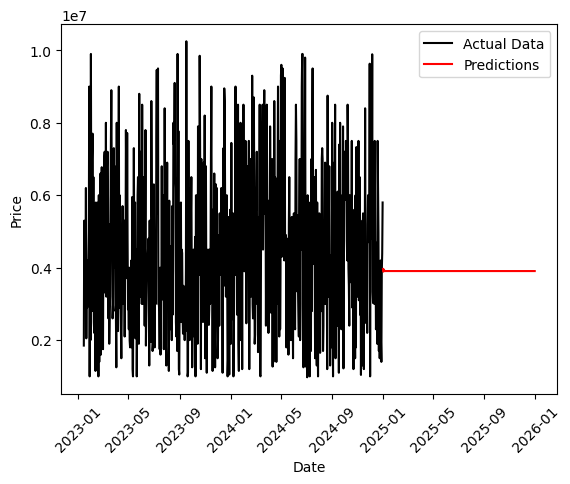

In [ ]:

model7=ARIMA(df_model['Price_Sqrt_Log'].dropna(),order=(4,0,1))
model7=model7.fit()
forecast_steps=365
predictions=model7.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = (np.exp(pred))**2
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:2]

[3963080.101200984, 3890368.9986678814]

In [ ]:
model = auto_arima(df_model['Price_Cbrt_Log'].dropna(), seasonal=False, trace=True,stepwise=False)
model=model.fit(df_model['Price_Cbrt_Log'].dropna())


 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4368.696, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3442.900, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2730.248, Time=0.57 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=2209.515, Time=0.34 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=1856.817, Time=0.43 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=1556.365, Time=0.58 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-331.097, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=1.23 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-344.881, Time=0.81 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=1.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-348.173, Time=3.80 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=1.96 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AI

In [ ]:
model8 = ARIMA(train['Price_Cbrt_Log'].dropna(), order=(2,0,1))
model8 = model8.fit()
arima_pred = model8.predict(start=len(train), end=len(train) + len(test) - 1)
test['arimaPred8'] = arima_pred.values
print(np.sqrt(mean_squared_error(test['Price_Cbrt_Log'], test['arimaPred8'])))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0.1824335390628097


<ipython-input-186-af7378a10a87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['arimaPred8'] = arima_pred.values


In [ ]:
mae = mean_absolute_error(test['Price_Cbrt_Log'], test['arimaPred8'])
mse = mean_squared_error(test['Price_Cbrt_Log'], test['arimaPred8'])
rmse = np.sqrt(mse)
aic=model8.aic
bic=model8.bic
print("MAE {} MSE {} RMSE {} AIC {} BIC {}".format(mae,mse,rmse,aic,bic))

MAE 0.1462687611273186 MSE 0.03328199617498172 RMSE 0.1824335390628097 AIC -294.4642255110497 BIC -272.60616627489037


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

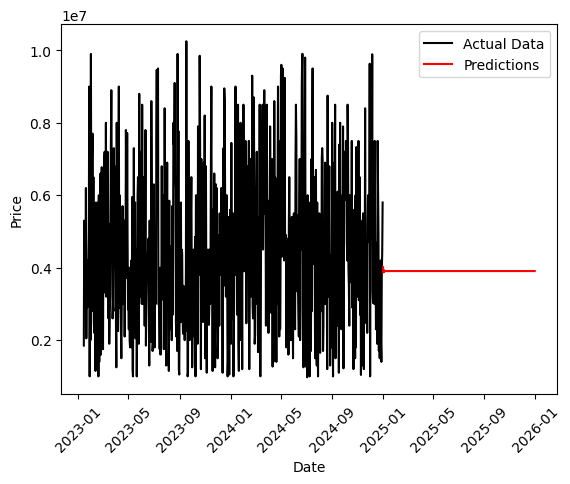

In [ ]:

model8=ARIMA(df_model['Price_Cbrt_Log'].dropna(),order=(2,0,1))
model8=model8.fit()
forecast_steps=365
predictions=model8.forecast(steps=forecast_steps)
future_dates = pd.date_range(start='2025-01-01', periods=forecast_steps, freq='D')
predicted_prices = []
for pred in predictions.values:
    t = (np.exp(pred))**3
    predicted_prices.append(t)
plt.plot(df_model.index, df_model['Price'], label='Actual Data',color="black")
plt.plot(future_dates, predicted_prices, label='Predictions',color="red")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
predicted_prices[0:2]

[4013588.839997592, 3870839.8654668215]

**Model 1**

* MAE 2415237.793480728
* MSE 9179710681927.602
* RMSE 3029803.7365360158  
* AIC 18768.875424103928
* BIC 18781.990259645623

**Model 2**

* MAE 0.43880219224387734
* MSE 0.299541281961732
* RMSE 0.5473036469472243
* AIC 990.9113551858292
* BIC 1012.7694144219885

**Model 3**

* MAE 423.8443016585331
* MSE 265006.35987795965
* RMSE 514.7876842718362  
* AIC 9007.568125731274
* BIC 9029.426184967433

**Model 4**

* MAE 22.532150145107835
* MSE 759.0765564136253
* RMSE 27.551344003761873
* AIC 5582.534501836204
* BIC 5613.135784766827

**Model 5**

* MAE 0.0564336767521727
* MSE 0.004996274208678734
* RMSE 0.070684327885881  
* AIC -1402.2247383650954
* BIC -1371.6234554344724

**Model 6**

* MAE 0.023949603787130666
* MSE 0.0009014679797580921
* RMSE 0.030024456360741858  
* AIC -2410.4712349991833
* BIC -2392.984787610256

**Model 7**

* MAE 0.21902355811024302
* MSE 0.07488183886568145
* RMSE 0.2736454619862742
* AIC 181.50043813576946
* BIC 212.10172106639246

**Model 8**

* MAE 0.1462687611273186
* MSE 0.03328199617498172
* RMSE 0.1824335390628097
* AIC -294.4642255110497
* BIC -272.60616627489037

Model 6 is the best performing model